# Student Data
This notebook analyzes pass/fail data for a class

In [44]:
data = [ 54, 0, 97, 22, 44, 64, 75, 92, 83, 85, 100, 76, 74, 55, 65, 70, 92, 88, 33, 86, 87, 88, 89, 91, 93, 92, 49, 98]
print (data)

[54, 0, 97, 22, 44, 64, 75, 92, 83, 85, 100, 76, 74, 55, 65, 70, 92, 88, 33, 86, 87, 88, 89, 91, 93, 92, 49, 98]


In [45]:
import numpy as np

grades = np.array(data)

print(grades)

[ 54   0  97  22  44  64  75  92  83  85 100  76  74  55  65  70  92  88
  33  86  87  88  89  91  93  92  49  98]


In [46]:
grades.shape

(28,)

In [47]:
grades[0]

54

In [48]:
grades.mean()

72.92857142857143

In [53]:
grades.shape

(28,)

In [ ]:
grades.max()

100

In [ ]:
study_hours = [10, 0, 3, 20, 70, 30, 5, 10, 15, 20, 14, 17, 18, 19, 30, 9, 0, 15, 8, 9, 20, 22, 24, 26, 30, 31, 32, 33]
s_hours = np.array(study_hours)
s_hours.shape
student_data = np.array([study_hours, grades])
student_data
# print(student_data[0][0])

array([[ 10,   0,   3,  20,  70,  30,   5,  10,  15,  20,  14,  17,  18,
         19,  30,   9,   0,  15,   8,   9,  20,  22,  24,  26,  30,  31,
         32,  33],
       [ 44,  98,  49,  92,  93,  64,  65,  91,  89,  88,  22,  87,  85,
         55,  74,  76,  83,  88, 100,  92,  54,  86,  70,  33,  75,  97,
         92,   0]], dtype=int64)

In [ ]:
avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()
print(f'Average Study time: {avg_study}\n Average grade: {avg_grade}')

Average Study time: 19.285714285714285
 Average grade: 72.92857142857143


In [ ]:
import pandas as pd
df_students = pd.DataFrame({'Name': ['Dan', 'JoAnn', 'Zeke', 'Fred', 'Zelmo', 'Olaf', 'Doogie', 'Ed', 'Earl', 'Cheeto',
                                     'Thor', 'Barbie', 'Kate', 'Bob', 'Joe', 'John', 'Paul', 'George', 'Ringo', 'Mick',
                                     'Frank', 'Elmer', 'Willie', 'Don', 'Keith', 'Joan', 'Larry', 'Moe'],
                            'Study_Hours': student_data[0],
                            'Grade': student_data[1]  })
df_students
df_students.loc[0]
df_students.loc[0, 'Grade']
df_students[df_students['Name'] == 'Zelmo']
df_students.query('Name == "Zelmo"')
df_students[df_students.Name == "Don"]
df_students_nu = pd.read_csv('Student_Data.csv',delimiter = ',', header = 'infer')
df_students_nu

df_students_nu.isnull().sum()
df_students_nu = df_students_nu.dropna(axis=0)
df_students_nu.isnull().sum()
df_students_nu.mean()
mean_grade = df_students_nu['Grade'].mean()
# print(mean_grade)
mean_hours = df_students_nu['Study_Hours'].mean()
# print(mean_hours)
df_students_nu[df_students_nu.Study_Hours > mean_hours].Grade.mean()
passed = pd.Series(df_students_nu.Grade >= 60)
df_students_nu = pd.concat([df_students_nu, passed.rename('Passed')], axis = 1)
# print(df_students_nu)
df_students_nu.groupby(df_students_nu.Passed).Name.count()

Passed
False     7
True     21
Name: Name, dtype: int64

In [ ]:
# print(df_students_nu.groupby(df_students_nu.Passed))
print(df_students_nu.groupby(df_students_nu.Passed)['Study_Hours', 'Grade'].mean())


        Study_Hours      Grade
Passed                        
False     22.714286  36.714286
True      18.142857  85.000000


C:\Users\levin\AppData\Local\Temp\ipykernel_33740\2968502690.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df_students_nu.groupby(df_students_nu.Passed)['Study_Hours', 'Grade'].mean())


In [ ]:
df_students_nu = df_students_nu.sort_values('Grade')
df_students_nu


,Unnamed: 0,Name,Study_Hours,Grade,Passed
1,1,JoAnn,0,0,False
3,3,Fred,20,22,False
18,18,Ringo,8,33,False
4,4,Zelmo,70,44,False
26,26,Larry,32,49,False
0,0,Dan,10,54,False
13,13,Bob,19,55,False
5,5,Olaf,30,64,True
14,14,Joe,30,65,True
15,15,John,9,70,True


In [ ]:
df_students_nu = df_students_nu.sort_values('Study_Hours', ascending = False)

C:\Users\levin\AppData\Local\Temp\ipykernel_33740\637302975.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(df_students_nu.Name, rotation=90)
C:\Users\levin\AppData\Local\Temp\ipykernel_33740\637302975.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


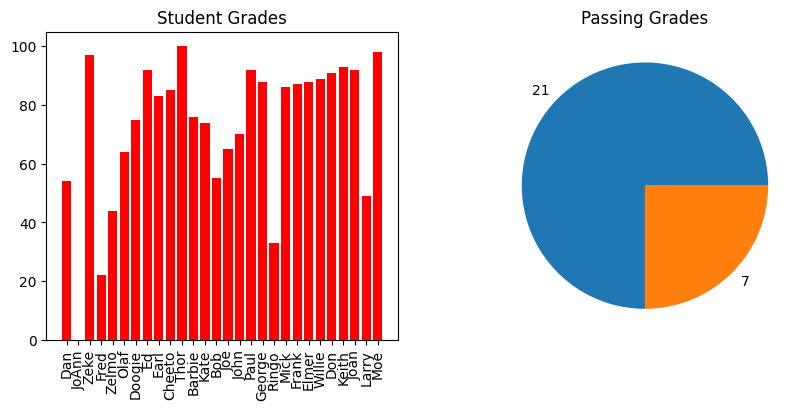

In [50]:
from matplotlib import pyplot as plt

# fig = plt.figure(figsize = (12.8, 7.2))

fig, ax = plt.subplots(1, 2, figsize = (10, 4))

# plt.bar(x = df_students_nu.Name, height = df_students_nu.Grade, color = 'red')

ax[0].bar(x = df_students_nu.Name, height = df_students_nu.Grade, color = 'red')

# plt.title('Student Grades')

ax[0].set_title('Student Grades')

# plt.xticks(rotation=90)

ax[0].set_xticklabels(df_students_nu.Name, rotation=90)

passes_count  = df_students_nu.Passed.value_counts()
ax[1].pie(passes_count, labels=passes_count)
ax[1].set_title('Passing Grades')

# plt.xlabel('Name')
# plt.ylabel("Grade")

# plt.show()
fig.show()

<AxesSubplot:xlabel='Name'>

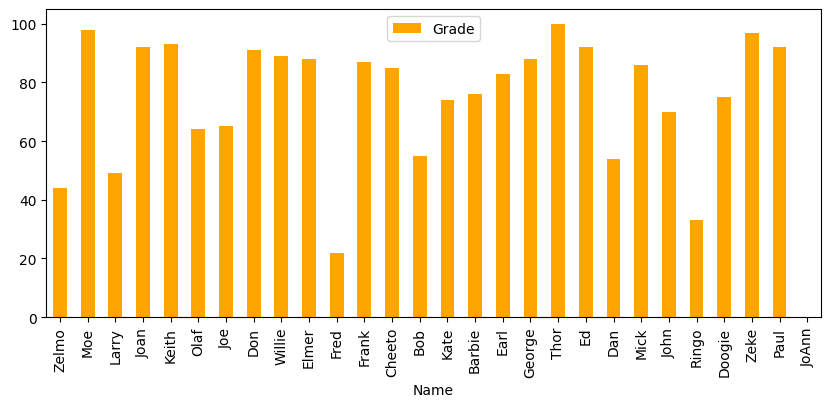

In [ ]:
df_students_nu.plot.bar(x='Name', y = 'Grade', figsize=(10,4), color ="orange")

C:\Users\levin\AppData\Local\Temp\ipykernel_33740\1331209394.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


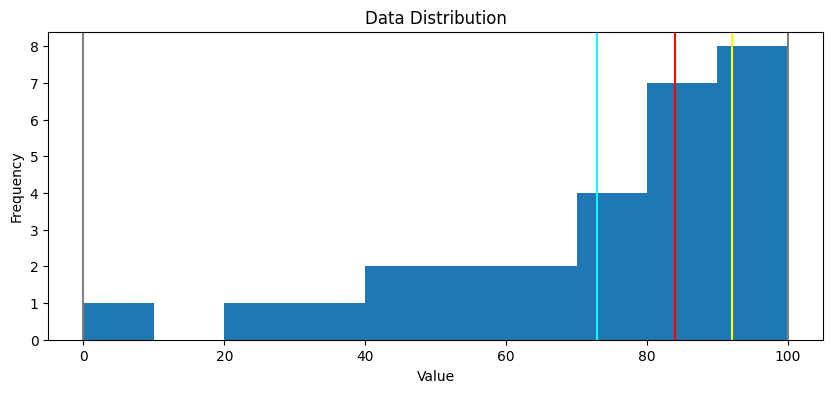

In [ ]:
grades = df_students_nu.Grade

min_val = df_students_nu.Grade.min()
max_val = df_students_nu.Grade.max()
mean_val = df_students_nu.Grade.mean()
med_val = df_students_nu.Grade.median()
mode_val = df_students_nu.Grade.mode()[0]

fig = plt.figure(figsize=(10,4))
plt.hist(grades)

plt.axvline(x=min_val, color = 'gray')
plt.axvline(x=max_val, color = 'gray')
plt.axvline(x=mean_val, color = 'cyan')
plt.axvline(x=med_val, color = 'red')
plt.axvline(x=mode_val, color = 'yellow')

plt.title('Data Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
fig.show()

C:\Users\levin\AppData\Local\Temp\ipykernel_33740\4277318246.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


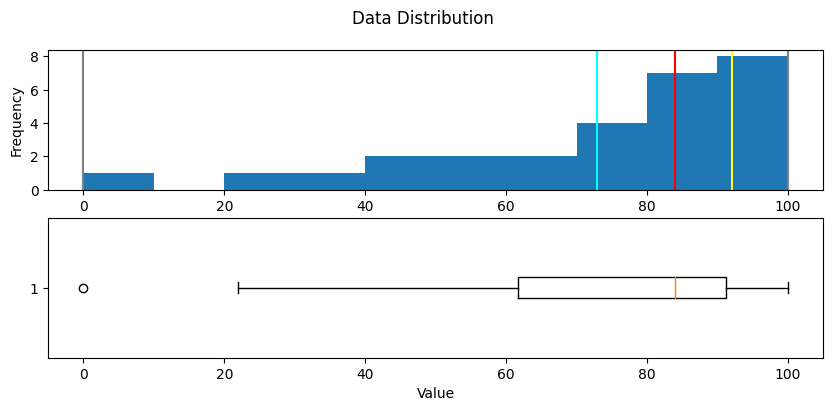

In [ ]:
fig, ax = plt.subplots(2, 1, figsize = (10, 4))

ax[0].hist(grades)
ax[0].set_ylabel('Frequency')

ax[0].axvline(x=min_val, color = 'gray')
ax[0].axvline(x=max_val, color = 'gray')
ax[0].axvline(x=mean_val, color = 'cyan')
ax[0].axvline(x=med_val, color = 'red')
ax[0].axvline(x=mode_val, color = 'yellow')

ax[1].boxplot(grades, vert = False)
ax[1].set_xlabel('Value')

fig.suptitle('Data Distribution')
fig.show()

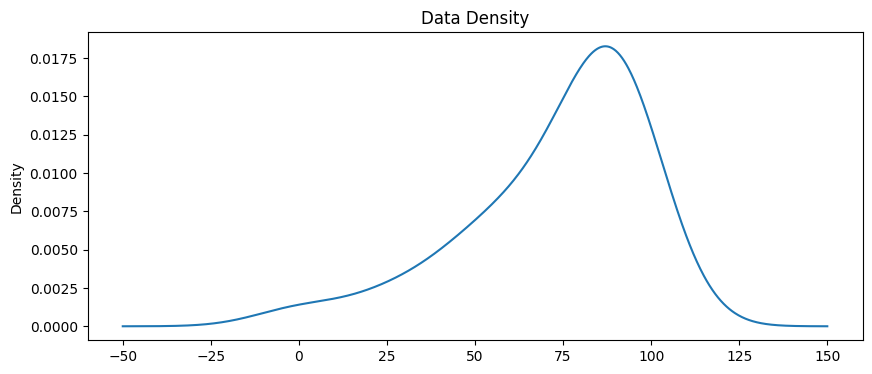

In [ ]:
def show_density(data):
    fig = plt.figure(figsize=(10,4))
    data.plot.density()
    plt.title('Data Density')
    plt.show()

show_density(df_students_nu.Grade)